# Project: Wrangle and Analyze Data

## Project Overview 
### The Project's tasks are as follows: 
#### 1. Data Wrangling: 

   - Gathering Data
   - Assessing Data
   - Cleaning Data
   
#### 2. Storing, Analyzing and Visualizing our Wrangled Data. 
#### 3. Reports on our Data Wrangling efforts and Data Analysis and Visualizations.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import requests
import re
import json
from pandas.io.json import json_normalize
%matplotlib inline

## Data Gathering
1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [3]:
archive = pd.read_csv('twitter-archive-enhanced.csv')
archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [4]:
images = pd.read_csv('image-predictions.tsv', sep = '\t')
images.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

In [5]:
api_data = []
with open('tweet_json.txt') as f:
    for line in f:
        json_data = json.loads(line)
        t_id = json_data['id']
        r_count = json_data['retweet_count']
        f_count = json_data['favorite_count']
        json_data.clear()
        json_data['id'] = t_id
        json_data['retweet_count'] = r_count
        json_data['favorite_count'] = f_count
        api_data.append(json_data)
tweets_table = pd.DataFrame(api_data)
print(tweets_table)

      favorite_count                  id  retweet_count
0              39467  892420643555336193           8853
1              33819  892177421306343426           6514
2              25461  891815181378084864           4328
3              42908  891689557279858688           8964
4              41048  891327558926688256           9774
5              20562  891087950875897856           3261
6              12041  890971913173991426           2158
7              56848  890729181411237888          16716
8              28226  890609185150312448           4429
9              32467  890240255349198849           7711
10             31166  890006608113172480           7624
11             28268  889880896479866881           5156
12             38818  889665388333682689           8538
13             27672  889638837579907072           4735
14             15359  889531135344209921           2321
15             25652  889278841981685760           5637
16             29611  888917238123831296        

In [6]:
tweets_table.head(20)

,favorite_count,id,retweet_count
0,39467,892420643555336193,8853
1,33819,892177421306343426,6514
2,25461,891815181378084864,4328
3,42908,891689557279858688,8964
4,41048,891327558926688256,9774
5,20562,891087950875897856,3261
6,12041,890971913173991426,2158
7,56848,890729181411237888,16716
8,28226,890609185150312448,4429
9,32467,890240255349198849,7711


## Assessing Data
After gathering the above  three data sets, we now assess them visually and programmatically for quality and tidiness issues. The aim is to detect and document at least eight (8) quality issues and two (2) tidiness issues. 
They are: 
 - Twitter Archive
 - Tweet Image Predictions 
 - Twitter API Data


### Twitter Archive

In [7]:
archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

* tweet_id is an integer.
- timestamp and retweeted_status_timestamp are of 'object' datatype.

In [8]:
# duplicates
sum(archive['tweet_id'].duplicated())

0

In [9]:
archive.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [10]:
print(archive['rating_denominator'].describe())
print('-'*40)
print(archive['rating_denominator'].value_counts())

count    2356.000000
mean       10.455433
std         6.745237
min         0.000000
25%        10.000000
50%        10.000000
75%        10.000000
max       170.000000
Name: rating_denominator, dtype: float64
----------------------------------------
10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64


In [11]:
# printing first tweet of every possible value of 'rating_denominator'
denominator = archive['rating_denominator'].value_counts()
for c, i in enumerate(denominator.index):
    print(f"{c}: {archive.loc[archive['rating_denominator'] == i, 'text'].values[0]}")

0: This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU
1: RT @dog_rates: After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https:/…
2: This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10 https://t.co/Kky1DPG4iq
3: Here's a brigade of puppers. All look very prepared for whatever happens next. 80/80 https://t.co/0eb7R1Om12
4: Happy 4/20 from the squad! 13/10 for all https://t.co/eV1diwds8a
5: This is an Albanian 3 1/2 legged  Episcopalian. Loves well-polished hardwood flooring. Penis on the collar. 9/10 https://t.co/d9NcXFKwLv
6: I'm aware that I could've said 20/16, but here at WeRateDogs we are very professional. An inconsistent rating scale is simply irresponsible
7: Happy Wednesday here's a bucket of pups. 44/40 would pet all at once https://t.co/HppvrYuamZ
8: The floofs have been released I repeat the floofs have been 

- Some of the ratings are wrongly mentioned e.g. in the last one (17th), the rating should be 13/10, not 960/00.
- Some tweets are not about dogs, so doesn't contain rating e.g. 6th and 9th one. (tweets not containing dog images can be discarded). 
- Tweets starting from RT are retweets.

In [12]:
# consider only orignal tweets (no retweets) 
archive[archive['retweeted_status_id'].isnull()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


In [13]:
# name having length less than 3 or 'None'
archive[archive['name'].apply(lambda x: str(x)=='None' or len(str(x)) < 3)]['name']

5       None
7       None
12      None
24      None
25      None
30      None
32      None
35      None
37      None
41      None
42      None
47      None
55      None
56         a
59      None
62      None
64      None
72      None
78      None
83      None
88      None
89      None
93      None
96      None
99      None
100     None
101     None
103     None
110     None
112     None
        ... 
2322    None
2323    None
2324    None
2327       a
2328    None
2329    None
2330    None
2331    None
2332    None
2333      an
2334       a
2335      an
2336    None
2337    None
2338    None
2339    None
2340    None
2341    None
2342    None
2343    None
2344    None
2347       a
2348       a
2349      an
2350       a
2351    None
2352       a
2353       a
2354       a
2355    None
Name: name, Length: 824, dtype: object

- name has values that are string 'None' instead of NaN and some values have unusual names of less than 3 characters such as 'a'.

### Tweet Images

In [15]:
images.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [16]:
len(archive) - len(images)

281

In [17]:
# duplicates
sum(images['jpg_url'].duplicated())

66

In [18]:
images.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


### Twitter API Data

In [19]:
tweets_table.tail()

,favorite_count,id,retweet_count
2349,111,666049248165822465,41
2350,311,666044226329800704,147
2351,128,666033412701032449,47
2352,132,666029285002620928,48
2353,2535,666020888022790149,532


In [20]:
tweets_table.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
favorite_count    2354 non-null int64
id                2354 non-null int64
retweet_count     2354 non-null int64
dtypes: int64(3)
memory usage: 55.2 KB


In [21]:
tweets_table.describe()

,favorite_count,id,retweet_count
count,2354.000000,2.354000e+03,2354.000000
mean,8080.968564,7.426978e+17,3164.797366
std,11814.771334,6.852812e+16,5284.770364
min,0.000000,6.660209e+17,0.000000
25%,1415.000000,6.783975e+17,624.500000
50%,3603.500000,7.194596e+17,1473.500000
75%,10122.250000,7.993058e+17,3652.000000
max,132810.000000,8.924206e+17,79515.000000


In [22]:
# missing rows
len(archive) - len(tweets_table)

2

In [23]:
# duplicates
sum(tweets_table['id'].duplicated())

0

In [24]:
sum(tweets_table['retweet_count'].duplicated())

630

In [25]:
sum(tweets_table['favorite_count'].duplicated())


347

### Quality issues
1. tweet_id is an integer

2. timestamp is of 'object' datatype.

3. name has values that are string 'None' instead of NaN and some values have unusual names of less than 3 characters such as 'a'.

4. NaNs represented as 'None' (str) for name, doggo, floofer, pupper, and puppo columns.

5. Archive data contains retweets.

6. Some of the ratings are wrongly mentioned e.g. in one case, the rating should've been 13/10, not 960/00, while some tweets are not about dogs, so doesn't contain rating (tweets not containing dog images can be discarded), and some of the ratings contain decimal in the numerator.

7. There are some missing rows in images dataset (2075 rows instead of 2356): either the rows are missing or some tweets didn't have dog images.

8. There are some duplicate jpg_urls.

9. p1, p2, and p3 contains underscores instead of spaces in the string.

### Tidiness issues
1. The different dataframes should be merged into a single one.

2. There are 4 different columns (doggo, floofer, pupper, and puppo) for dog stages.

## Cleaning Data
In this section, clean **all** of the issues you documented while assessing. 

**Note:** Make a copy of the original data before cleaning. Cleaning includes merging individual pieces of data according to the rules of [tidy data](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html). The result should be a high-quality and tidy master pandas DataFrame (or DataFrames, if appropriate).

In [16]:
# Make copies of original pieces of data
archive_clean = archive.copy()
images_clean = images.copy()
tweets_clean = tweets_table.copy()

### Tidiness Issue #1: 

#### Define: 
- Merge all Dataframes 

#### Code

In [23]:
# merging the dataframes
df_final = pd.merge(archive_clean, images_clean, left_on='tweet_id', right_on='tweet_id')
df_final = pd.merge(df_final, tweets_clean, left_on='tweet_id', right_on='id')

- By merging, we've already removed tweets not containing dog images.

#### Test

In [28]:
df_final.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,favorite_count,id,retweet_count
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,...,False,bagel,0.085851,False,banana,0.076110,False,39467,892420643555336193,8853
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,...,True,Pekinese,0.090647,True,papillon,0.068957,True,33819,892177421306343426,6514
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,...,True,malamute,0.078253,True,kelpie,0.031379,True,25461,891815181378084864,4328
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,...,False,Labrador_retriever,0.168086,True,spatula,0.040836,False,42908,891689557279858688,8964
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,...,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,41048,891327558926688256,9774


In [24]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2073 entries, 0 to 2072
Data columns (total 31 columns):
tweet_id                      2073 non-null int64
in_reply_to_status_id         23 non-null float64
in_reply_to_user_id           23 non-null float64
timestamp                     2073 non-null object
source                        2073 non-null object
text                          2073 non-null object
retweeted_status_id           79 non-null float64
retweeted_status_user_id      79 non-null float64
retweeted_status_timestamp    79 non-null object
expanded_urls                 2073 non-null object
rating_numerator              2073 non-null int64
rating_denominator            2073 non-null int64
name                          2073 non-null object
doggo                         2073 non-null object
floofer                       2073 non-null object
pupper                        2073 non-null object
puppo                         2073 non-null object
jpg_url                       2073 

### Tidiness Issue #2:

#### Define
- Single column for Dogs stages

#### Code

In [51]:
def find_dog_category(val):
    is_doggo = val[0]
    is_floofer = val[1]
    is_pupper = val[2]
    is_puppo = val[3]
    res = ''
    if is_doggo != 'None':
        res += 'doggo '
    if is_floofer != 'None':
        res += 'floofer '
    if is_pupper != 'None':
        res += 'pupper '
    if is_puppo != 'None':
        res += 'puppo '
    return res

df_final['dog_category'] = df_final[['doggo', 'floofer', 'pupper', 'puppo']].apply(find_dog_category, axis = 1)

#### Test

In [52]:
df_final.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,favorite_count,id,retweet_count,dog_category
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,...,bagel,0.085851,False,banana,0.076110,False,39467,892420643555336193,8853,
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,...,Pekinese,0.090647,True,papillon,0.068957,True,33819,892177421306343426,6514,
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,...,malamute,0.078253,True,kelpie,0.031379,True,25461,891815181378084864,4328,
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,...,Labrador_retriever,0.168086,True,spatula,0.040836,False,42908,891689557279858688,8964,
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,...,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,41048,891327558926688256,9774,


In [31]:
df_final.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo',
       'jpg_url', 'img_num', 'p1', 'p1_conf', 'p1_dog', 'p2', 'p2_conf',
       'p2_dog', 'p3', 'p3_conf', 'p3_dog', 'favorite_count', 'id',
       'retweet_count', 'dog_category'],
      dtype='object')

### Quality Issue #1:

#### Define
- Change dtype of tweet_id to str

#### Code

In [32]:
# change 'tweet_id' to str/object
df_final['tweet_id'] = df_final['tweet_id'].astype(str)

#### Test

In [34]:
df_final['tweet_id'].dtype

dtype('O')

### Quality Issue #2:

#### Define
- Change dtype of timestamp to datetime

#### Code

In [36]:
# change the 'timestamp' column to a datetime object
df_final['timestamp'] = pd.to_datetime(df_final['timestamp'])

#### Test

In [45]:
df_final['timestamp'].dtype

dtype('<M8[ns]')

### Quality Issue #3:

#### Define
- Fix various issues with name

#### Code

In [88]:
df_final['name'] = df_final['name'].astype(str)

In [89]:
lowercase_names = []
for row in df_final['name']:
    if row[0].islower() and row not in lowercase_names:
        lowercase_names.append(row)
print(lowercase_names)

['nan']


In [90]:
# replace names starting with a lowercase letter with NaNs
df_final['name'].replace(lowercase_names, np.nan, inplace = True)

# replace 'None' with NaN
df_final['name'].replace('None', np.nan, inplace = True)

#### Test

In [91]:
# find names starting with a lowercase letter
lowercase_names[0] in df_final['name']

False

### Quality Issue #4:

#### Define
- Remove Retweets

#### Code

In [74]:
# consider only orignal tweets (no retweets) 
df_final = df_final[df_final['retweeted_status_id'].isnull()]
# remove retweet related columns
df_final = df_final.drop(['retweeted_status_id', 
                        'retweeted_status_user_id', 
                        'retweeted_status_timestamp'], 
                       axis=1)

#### Test

In [76]:
df_final.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo',
       'jpg_url', 'img_num', 'p1', 'p1_conf', 'p1_dog', 'p2', 'p2_conf',
       'p2_dog', 'p3', 'p3_conf', 'p3_dog', 'favorite_count', 'id',
       'retweet_count', 'dog_category'],
      dtype='object')

### Quality Issue #5:

#### Define
- Drop unnecessary columns 

#### Code

In [77]:
# drop superfluous columns
df_final.drop(['in_reply_to_status_id', 
              'in_reply_to_user_id',
              'source',
              'img_num'], axis=1, inplace=True)

#### Test

In [78]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 2072
Data columns (total 25 columns):
tweet_id              1994 non-null object
timestamp             1994 non-null datetime64[ns]
text                  1994 non-null object
expanded_urls         1994 non-null object
rating_numerator      1994 non-null int64
rating_denominator    1994 non-null int64
name                  1350 non-null object
doggo                 1994 non-null object
floofer               1994 non-null object
pupper                1994 non-null object
puppo                 1994 non-null object
jpg_url               1994 non-null object
p1                    1994 non-null object
p1_conf               1994 non-null float64
p1_dog                1994 non-null bool
p2                    1994 non-null object
p2_conf               1994 non-null float64
p2_dog                1994 non-null bool
p3                    1994 non-null object
p3_conf               1994 non-null float64
p3_dog                1994 n

### Quality Issue #6:

#### Define
- Replace underscore with space in p1, p2, and p3

#### Code

In [79]:
# replace underscores with spaces in p1, p2, and p3
df_final['p1'].replace('_', ' ', regex=True, inplace = True)
df_final['p2'].replace('_', ' ', regex=True, inplace = True)
df_final['p3'].replace('_', ' ', regex=True, inplace = True)

#### Test 

In [80]:
df_final['p1'].tail()

2068        miniature pinscher
2069       Rhodesian ridgeback
2070           German shepherd
2071                   redbone
2072    Welsh springer spaniel
Name: p1, dtype: object

### Quality Issue #7

#### Define
- Drop duplicted jpg_urls

#### Code

In [81]:
# duplicate `jpg_url`
sum(df_final['jpg_url'].duplicated())

0

In [82]:
# drop duplicate jpg_url
df_final.drop_duplicates(subset=['jpg_url'], keep='last', inplace=True)

#### Test

In [83]:
sum(df_final['jpg_url'].duplicated())

0

## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [84]:
df_final.to_csv('twitter_archive_master.csv')

In [85]:
df_final

,tweet_id,timestamp,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,...,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,favorite_count,id,retweet_count,dog_category
0,892420643555336193,2017-08-01 16:23:56,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,...,bagel,0.085851,False,banana,0.076110,False,39467,892420643555336193,8853,
1,892177421306343426,2017-08-01 00:17:27,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,...,Pekinese,0.090647,True,papillon,0.068957,True,33819,892177421306343426,6514,
2,891815181378084864,2017-07-31 00:18:03,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,...,malamute,0.078253,True,kelpie,0.031379,True,25461,891815181378084864,4328,
3,891689557279858688,2017-07-30 15:58:51,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,...,Labrador retriever,0.168086,True,spatula,0.040836,False,42908,891689557279858688,8964,
4,891327558926688256,2017-07-29 16:00:24,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,...,English springer,0.225770,True,German short-haired pointer,0.175219,True,41048,891327558926688256,9774,
5,891087950875897856,2017-07-29 00:08:17,Here we have a majestic great white breaching ...,https://twitter.com/dog_rates/status/891087950...,13,10,NaN,None,None,None,...,Irish terrier,0.116317,True,Indian elephant,0.076902,False,20562,891087950875897856,3261,
6,890971913173991426,2017-07-28 16:27:12,Meet Jax. He enjoys ice cream so much he gets ...,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,...,Border collie,0.199287,True,ice lolly,0.193548,False,12041,890971913173991426,2158,
7,890729181411237888,2017-07-28 00:22:40,When you watch your owner call another dog a g...,https://twitter.com/dog_rates/status/890729181...,13,10,NaN,None,None,None,...,Eskimo dog,0.178406,True,Pembroke,0.076507,True,56848,890729181411237888,16716,
8,890609185150312448,2017-07-27 16:25:51,This is Zoey. She doesn't want to be one of th...,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,...,Irish setter,0.193054,True,Chesapeake Bay retriever,0.118184,True,28226,890609185150312448,4429,
9,890240255349198849,2017-07-26 15:59:51,This is Cassie. She is a college pup. Studying...,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,...,Cardigan,0.451038,True,Chihuahua,0.029248,True,32467,890240255349198849,7711,doggo


## Analyzing and Visualizing Data
- In this section, we aim to produce (at least) three insights and one visualization 

### 1. Correlation between Favorite and Retweet Count

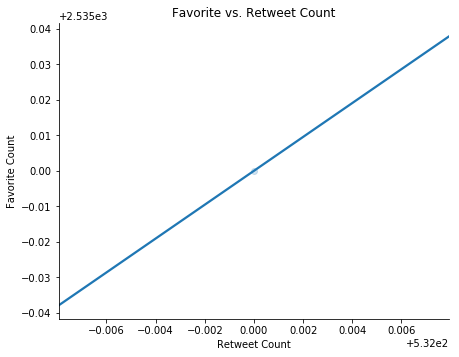

In [64]:
sns.lmplot(x="retweet_count", 
           y="favorite_count", 
           data=df1,
           size = 5,
           aspect=1.3,
           scatter_kws={'alpha':1/5})
plt.title('Favorite vs. Retweet Count')
plt.xlabel('Retweet Count')
plt.ylabel('Favorite Count');

- There's a positive correlation between favorite and retweet count 

### 2. Most common dog type

Text(0.5,0.98,'Most common dog type')

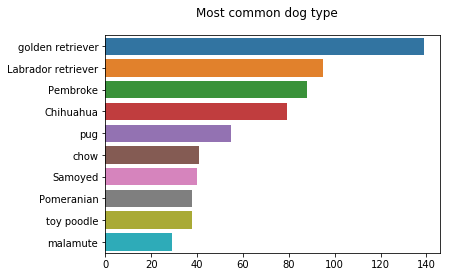

In [63]:
dog_type = df1['p1'].value_counts()[:10]
sns.barplot(dog_type.values, dog_type.index)
plt.suptitle('Most common dog type')

- The most common dog type is golden_retriever 